# FitzHugh-Nagumo analysis

The FitzHugh-Nagumo model is given by:

$$ \frac {dV} {dt} = V(1 - \frac {V^2} 3) - w + I_{ext} $$

$$ \tau \frac {dw} {dt} = V + a - b w $$

In [1]:
import brainpy as bp
import brainpy.math as bm
bm.set_dt(dt=0.02)

In [2]:
class FitzHughNagumo(bp.NeuGroup):
    def __init__(self, size, a=0.7, b=0.8, tau=12.5, Vth=1.9, **kwargs):
        super(FitzHughNagumo, self).__init__(size=size, **kwargs)

        self.a = a
        self.b = b
        self.tau = tau
        self.Vth = Vth

        self.V = bm.Variable(bm.zeros(size))
        self.w = bm.Variable(bm.zeros(size))
        self.spike = bm.Variable(bm.zeros(size))
        self.input = bm.Variable(bm.zeros(size))

    @staticmethod
    @bp.odeint(method='rk4')
    def integral(V, w, t, Iext, a, b, tau):
        dw = (V + a - b * w) / tau
        dV = V - V * V * V / 3 - w + Iext
        return dV, dw

    def update(self, _t, _dt):
        V, self.w[:] = self.integral(self.V, self.w, _t, self.input, self.a, self.b, self.tau)
        self.spike[:] = (V >= self.Vth) * (self.V < self.Vth)
        self.V[:] = V
        self.input[:] = 0.

## Simulation

Compilation used 0.0000 s.
Start running ...
Run 100.0% used 3.087 s.
Simulation is done in 3.087 s.



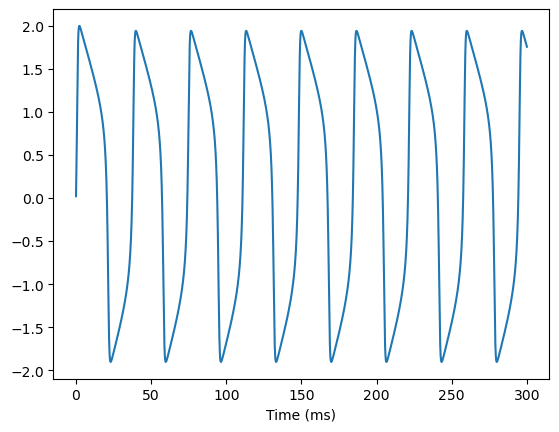

Compilation used 0.0000 s.
Start running ...
Run 100.0% used 3.096 s.
Simulation is done in 3.096 s.



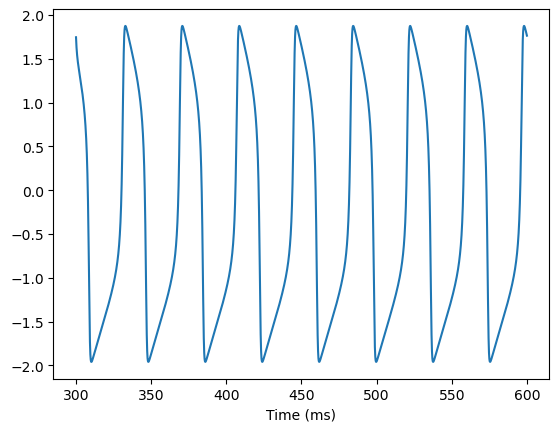

In [3]:
FNs = FitzHughNagumo(2, monitors=['V'])

FNs.run(duration=300., inputs=('input', 1.), report=True)
bp.visualize.line_plot(FNs.mon.ts, FNs.mon.V, show=True)

FNs.run(duration=(300., 600.), inputs=('input', 0.6), report=True)
bp.visualize.line_plot(FNs.mon.ts, FNs.mon.V, show=True)

## Phase plane analysis

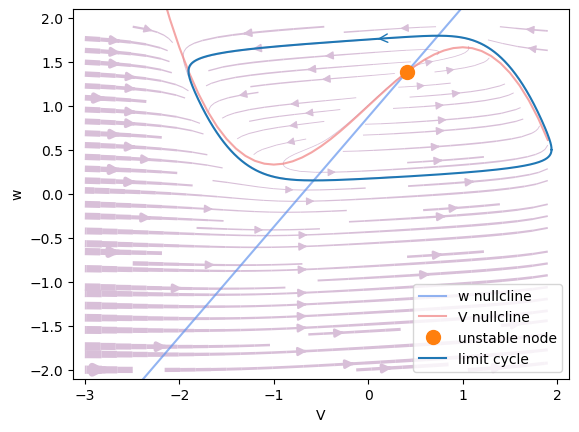

In [4]:
phase = bp.symbolic.OldPhasePlane(FNs,
                                  target_vars={'V': [-3, 2], 'w': [-2, 2]},
                                  fixed_vars=None,
                                  pars_update={'Iext': 1., "a": 0.7, 'b': 0.8, 'tau': 12.5})
phase.plot_nullcline()
phase.plot_fixed_point()
# phase.plot_trajectory(initials={'V': -1, 'w': 1}, duration=100.)
phase.plot_limit_cycle_by_sim(initials={'V': -1, 'w': 1}, duration=100.)
phase.plot_vector_field(show=True)

## Codimension 1 bifurcation analysis

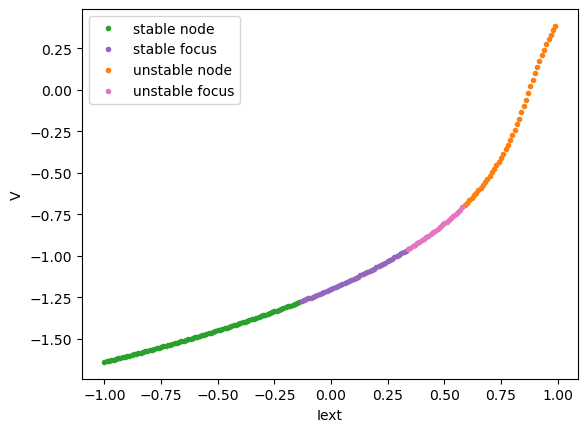

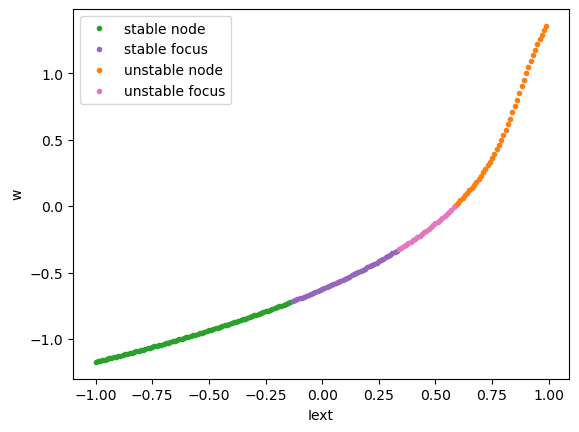

{'saddle node': {'p': [], 'V': [], 'w': []},
 'center': {'p': [], 'V': [], 'w': []},
 'stable node': {'p': [-1.0,
   -0.99,
   -0.98,
   -0.97,
   -0.96,
   -0.95,
   -0.94,
   -0.9299999999999999,
   -0.9199999999999999,
   -0.9099999999999999,
   -0.8999999999999999,
   -0.8899999999999999,
   -0.8799999999999999,
   -0.8699999999999999,
   -0.8599999999999999,
   -0.8499999999999999,
   -0.8399999999999999,
   -0.8299999999999998,
   -0.8199999999999998,
   -0.8099999999999998,
   -0.7999999999999998,
   -0.7899999999999998,
   -0.7799999999999998,
   -0.7699999999999998,
   -0.7599999999999998,
   -0.7499999999999998,
   -0.7399999999999998,
   -0.7299999999999998,
   -0.7199999999999998,
   -0.7099999999999997,
   -0.6999999999999997,
   -0.6899999999999997,
   -0.6799999999999997,
   -0.6699999999999997,
   -0.6599999999999997,
   -0.6499999999999997,
   -0.6399999999999997,
   -0.6299999999999997,
   -0.6199999999999997,
   -0.6099999999999997,
   -0.5999999999999996,
   -0.5899

In [5]:
bifurcation = bp.symbolic.OldBifurcation(FNs,
                                         target_pars={'Iext': [-1, 1]},
                                         target_vars={'V': [-3, 2], 'w': [-2, 2]},
                                         fixed_vars=None,
                                         pars_update={'a': 0.7, 'b': 0.8, 'tau': 12.5},
                                         numerical_resolution=0.01)
bifurcation.plot_bifurcation(show=True)

## Codimension 2 bifurcation analysis

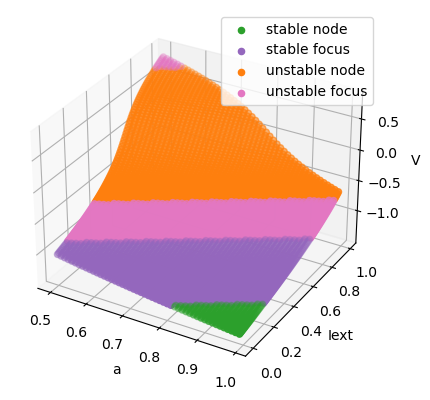

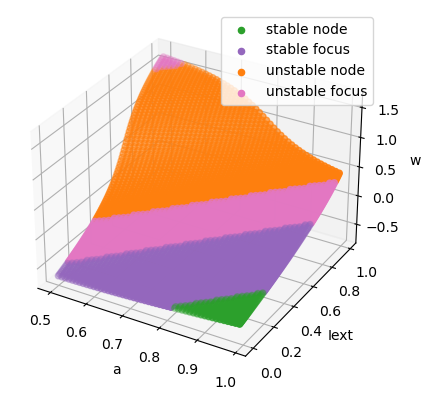

{'saddle node': {'p0': [], 'p1': [], 'V': [], 'w': []},
 'center': {'p0': [], 'p1': [], 'V': [], 'w': []},
 'stable node': {'p0': [0.8200000000000003,
   0.8200000000000003,
   0.8300000000000003,
   0.8300000000000003,
   0.8300000000000003,
   0.8400000000000003,
   0.8400000000000003,
   0.8400000000000003,
   0.8400000000000003,
   0.8500000000000003,
   0.8500000000000003,
   0.8500000000000003,
   0.8500000000000003,
   0.8500000000000003,
   0.8600000000000003,
   0.8600000000000003,
   0.8600000000000003,
   0.8600000000000003,
   0.8600000000000003,
   0.8600000000000003,
   0.8600000000000003,
   0.8700000000000003,
   0.8700000000000003,
   0.8700000000000003,
   0.8700000000000003,
   0.8700000000000003,
   0.8700000000000003,
   0.8700000000000003,
   0.8700000000000003,
   0.8800000000000003,
   0.8800000000000003,
   0.8800000000000003,
   0.8800000000000003,
   0.8800000000000003,
   0.8800000000000003,
   0.8800000000000003,
   0.8800000000000003,
   0.8800000000000003

In [6]:
bifurcation = bp.symbolic.OldBifurcation(FNs,
                                         target_pars=dict(a=[0.5, 1.], Iext=[0., 1.]),
                                         target_vars=dict(V=[-3, 3], w=[-3., 3.]),
                                         fixed_vars=None,
                                         pars_update={'b': 0.8, 'tau': 12.5},
                                         numerical_resolution=0.01)
bifurcation.plot_bifurcation(show=True)